   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
True Positive (TP): 9
False Positive (FP): 0
True Negative (TN): 10
False Negative (FN): 0
Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


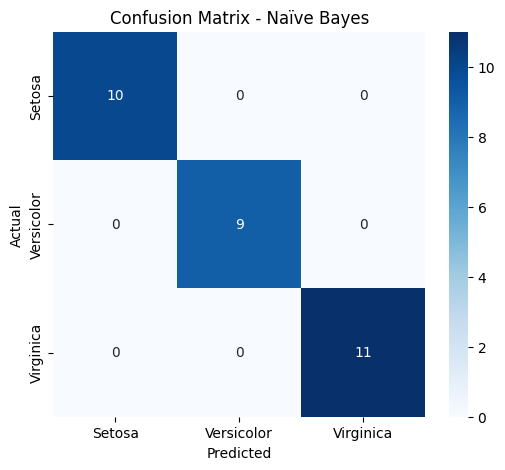

In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load the Iris dataset (local path or URL)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=columns)

# Step 3: Inspect the dataset
print(df.head())

# Step 4: Preprocessing (Feature Selection & Encoding)
X = df.iloc[:, :-1].values  # Features (sepal_length, sepal_width, petal_length, petal_width)
y = df.iloc[:, -1].values   # Target (species)

# Convert categorical target variable to numerical values
y = pd.Categorical(y).codes  # Convert 'species' to numeric values

# Step 5: Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature Scaling (Normalization)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # Fit and transform training data
X_test = sc.transform(X_test)  # Only transform test data

# Step 7: Create Gaussian Naïve Bayes Model and Train it
classifier = GaussianNB()
classifier.fit(X_train, y_train)  # Train the model

# Step 8: Predicting the test set results
y_pred = classifier.predict(X_test)

# Step 9: Confusion Matrix and Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 10: Extract TP, FP, TN, FN from the confusion matrix
TP = cm[1, 1]  # True Positive
FP = cm[0, 1]  # False Positive
TN = cm[0, 0]  # True Negative
FN = cm[1, 0]  # False Negative

print(f"True Positive (TP): {TP}")
print(f"False Positive (FP): {FP}")
print(f"True Negative (TN): {TN}")
print(f"False Negative (FN): {FN}")

# Step 11: Compute the performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted precision for multiclass
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted recall for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted F1 score for multiclass

print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 12: Visualization of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.title("Confusion Matrix - Naïve Bayes")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
